In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

def siteFG():
    FGPATH = '/homes/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

In [2]:
ds = pkl.load(open('/lustre/cosinga/hcolor/fig_md_analysis/5-16_datasort.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
ds.tickArgs({'direction':'in', 'labelsize':12})
ds.legendArgs({'frameon':False, 'loc':'upper right', 'fontsize':12}, slc = (0,0))
ds.rowLabelArgs(pos = [0.05, 0.05], txtkw = {'fontsize':14, 'ha':'left', 'va':'bottom'})
ds.colLabelArgs(pos = [0.5, 0.95], txtkw = {'fontsize':14, 'ha':'center', 'va':'top'})
ds.axisArgs({'xscale':'log', 'yscale':'log', 'xlim':[0.11866199299595938, 20]})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            [r'Red $\times$ HI'+'\nCross-Power', r'Blue $\times$ HI'+'\nCross-Power',
            r'All $\times$ HI' + '\nCross-Power', r'Color Ratio'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat']


# HIXGALAXY Z=0.0

In [3]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW'}
spaces = ['real', 'redshift']
colors = ['red', 'blue']
labels = [r'Red $\times$ HI'+'\nCross-Power', r'Blue $\times$ HI'+'\nCross-Power']
for space in spaces:
    for c in range(len(colors)):
        ip['space'] = space
        ip['color'] = colors[c]
        matches = ds.getMatching(ip)
#         [print(i.attrs) for i in matches]
        ds.makeFill(ip, {'alpha':0.65, 'label':labels[c]})

ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high',
      'censat':'no key found', 'mas':'CICW'}
spaces = ['real', 'redshift']
colors = ['ratio']
# labels = ['Real Space', r'Blue $\times$ HI'+'\nCross-Power']
for s in range(len(spaces)):
    for c in range(len(colors)):
        ip['space'] = spaces[s]
        ip['color'] = colors[c]
        ds.makeFill(ip, {'alpha':0.45})
        

The row values for space: ['real', 'redshift']
The column values for snapshot: [99]
The row values for color: ['ratio']
The column values for : ['no key found']


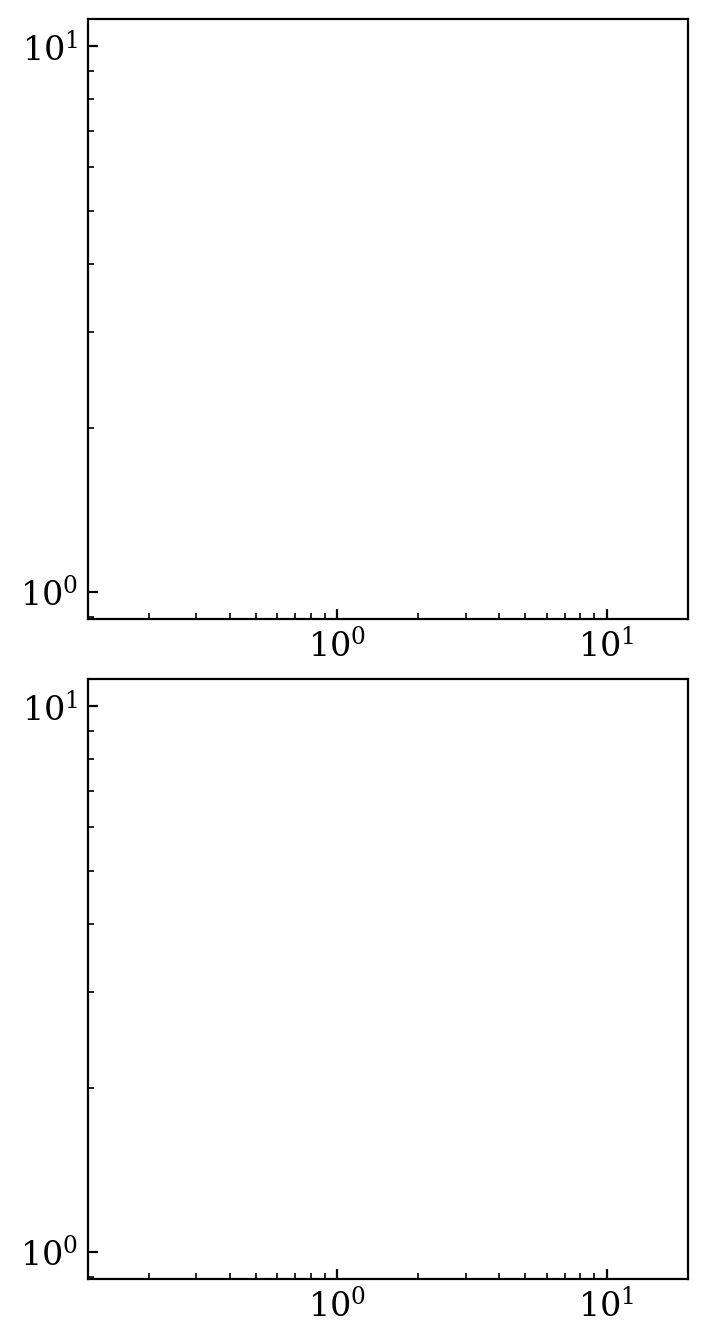

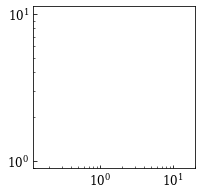

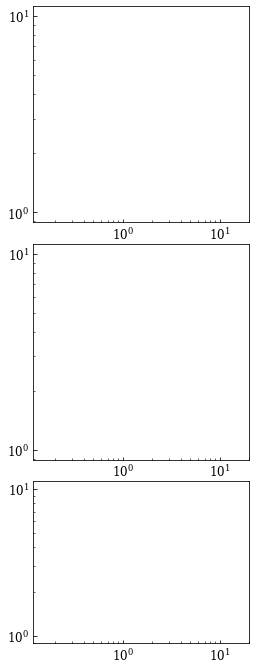

In [9]:

ip['figrid_process'] = 'fill'
ip['color'] = ['red', 'blue']
ip['space'] = spaces
ip['HI_fieldname'] = 'vn_hiptl'
fg = ds.figrid('color', 'space', 'snapshot', ip, figrid_args = {'hspace': 0.1}, figkw = {'dpi':200})

ip['color'] = 'ratio'
ratfg = ds.figrid('space', 'color', '', ip, figrid_args = {'panel_length' : 2.25})
fg = ds.combineFigrids(fg, ratfg)


In [10]:
fg.setDefaultTicksParams()
falpha = 0.25
fg.axisArgs({'ylim':(1e1, 1e4), 'facecolor':trgba('space', 'real', falpha)}, ['real'])
fg.axisArgs({'ylim':(1e-1, 1e4), 'facecolor':trgba('space', 'redshift', falpha)}, ['redshift'])
fg.axisArgs({'ylim':(0, 2), 'facecolor':'white', 'yscale':'linear'}, ['ratio'])
fg.legendArgs({}, (slice(1, None),0))
fg.setXLabel(XLAB, txtargs = {'fontsize':16, 'ha':'center'})
sub = r'\rm{Gal} \times \rm{HI}'
ypos = [0, 1 - (fg.panel_length + 0.5*fg.hspace[0])/fg.figsize[1]]
fg.setYLabel(YLAB%sub, ypos, txtargs = {'fontsize':16})
ypos = [0, (fg.panel_heights[-1] * 0.5 + fg.yborder[1])/fg.figsize[1]]
fg.setYLabel(r"P$_{\rm{Red}}$ (k) / P$_{\rm{Blue}}$ (k)", ypos, txtargs = {'fontsize':16})

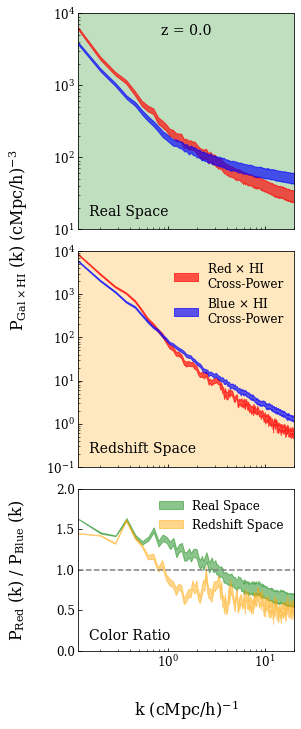

In [11]:
fg.plot()
fg.axes[2,0].plot(fg.axes[2, 0].get_xlim(), [1,1], linestyle = '--', color = 'gray')
fg.fig

Basic red vs blue plot for z = 0.0. I think going forward I'm not going to smooth the color ratio - I don't think it gained that much anyway. 

In [12]:
fg.save("rvb_fiducial_99.png")
fg.save("rvb_fiducial_99.pdf")

# Biases

[4.74, 9.84]